In [4]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from konlpy.tag import Okt  
from wordcloud import WordCloud

## 데이터 수집

In [5]:
url = 'http://apis.data.go.kr/1140100/CivilPolicyQnaService/PolicyQnaList?serviceKey='
key = '발급받은 인증키'
A = '&regFrom=20001101&regTo=20210928&firstIndex='
B = '&recordCountPerPage=1000'      # 한 페이지당 민원 1000개를 불러옴

In [6]:
my_data = []
cnt = 0
for i in range(50):
    cnt += 1
    request = requests.get(url + key + A + str(cnt) + B)
    for j in request.json()['resultList']:
        my_data.append(j)

In [7]:
df = pd.DataFrame(my_data)

In [8]:
len(df)

50000

In [9]:
df.to_csv("민원항목.csv", index = False)

In [10]:
list(set(df['ancName']))[0:5]

['대전광역시교육청', '강원도교육청', '경기도 과천시', '대구광역시 동구', '충청북도 보은군']

In [11]:
len(set(df['ancName']))

167

In [12]:
# 한글 깨짐

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.size'] = 15

C:\Users\ynk99\anaconda3\envs\sunlight\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


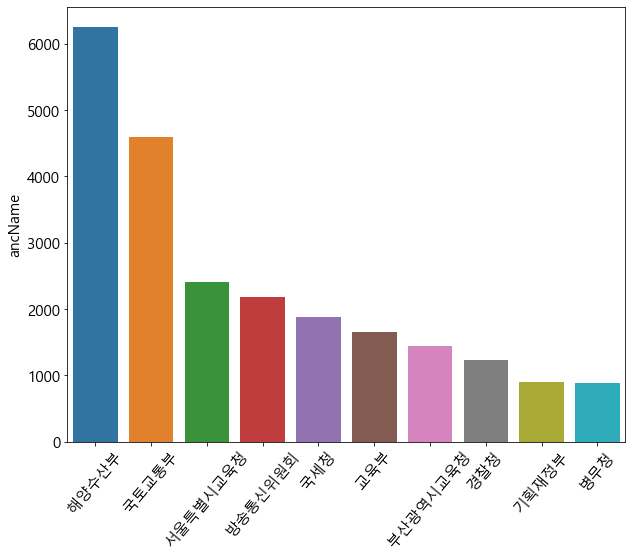

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(df.ancName.value_counts().index[:10], df.ancName.value_counts()[:10])
plt.xticks(rotation = 50)
plt.show()

In [14]:
df.ancName.value_counts().index[:3]    # 가장 만원이 많이 들어온 나라 top3
# 해양 수산부가 들어가 있는 이유는 우리나라가 3면이 바다인 나라이기 때문이라고 추측

Index(['해양수산부', '국토교통부', '서울특별시교육청'], dtype='object')

In [15]:
sea_bool = (df['ancName'] == '해양수산부')
sea = df[sea_bool]
sea.head()

,dutySctnNm,ancCode,ancName,regDate,title,faqNo
1,tqaplcy,1192000,해양수산부,20210927180110,"해양수산생명자원 확보 및 관리, 이용을 위한 중장기 로드맵",59705
2,tqaplcy,1192000,해양수산부,20210927180110,해양바이오산업 정의,59704
3,tqaplcy,1192000,해양수산부,20210927180109,해양바이오수소 시장 동향에 관련,59703
4,tqaplcy,1192000,해양수산부,20210927180104,해양바이오뱅크 운영,59702
5,tqaplcy,1192000,해양수산부,20210927180103,MBRIS란 무엇인가?,59700


In [16]:
url = 'http://apis.data.go.kr/1140100/CivilPolicyQnaService/PolicyQnaItem?serviceKey='
duty = '&dutySctnNm=tqapttn'

In [ ]:
cnt = 0
s_qnacontent = []
for i in sea['faqNo']:
    try:
        request = requests.get(url + key + '&faqNo=' + str(i) + duty)
        s_qnacontent.append(request.json()['resultData'])
        cnt += 1
    except:
        continue

In [ ]:
s_qna = pd.DataFrame(s_qnacontent)

In [ ]:
s_qna.to_csv("해양수산부민원.csv", index = False)

In [ ]:
traffic_bool = (df['ancName'] == '국토교통부')
traffic = df[traffic_bool]

In [ ]:
cnt = 0
tr_qnacontent = []
for i in traffic['faqNo']:
    try:
        request = requests.get(url + key + '&faqNo=' + str(i) + duty)
        tr_qnacontent.append(request.json()['resultData'])
        cnt += 1
    except:
        continue

In [ ]:
trqna = pd.DataFrame(tr_qnacontent)

In [ ]:
trqna.to_csv("국토교통부민원.csv", index= False)

In [ ]:
cnt = 0
e_qnacontent = []
for i in education['faqNo']:
    try:
        request = requests.get(url + key + '&faqNo=' + str(i) + duty)
        e_qnacontent.append(request.json()['resultData'])
        cnt += 1
    except:
        continue

In [ ]:
e_qna = pd.DataFrame(e_qnacontent)

In [13]:
education_bool = df.ancName.str.extract(r"(교육청)")    # 교육청은 여러가지 지역에 있으므로 정규표현식으로 교육청이 들어간 부서를 추출
education_bool = (education_bool.isna() == False)
education = df[education_bool[0]]

In [ ]:
cnt = 0
e_qnacontent = []
for i in education['faqNo']:
    try:
        request = requests.get(url + key + '&faqNo=' + str(i) + duty)
        e_qnacontent.append(request.json()['resultData'])
        cnt += 1
    except:
        continue

In [ ]:
e_qna.to_csv("교육청민원.csv", index = False)

## 데이터 분석

In [16]:
education = pd.read_csv("교육청민원.csv")
traffic = pd.read_csv("국토교통부민원.csv")
sea = pd.read_csv("해양수산부민원.csv")

In [17]:
education[0:5]

,faqNo,dutySctnNm,qnaTitl,qstnCntnCl,ansCntnCl,ancName,deptName,regDate,ancCode,deptCode,lawList,subjList
0,6786885,tqapttn,학교운영위원의 연임후 다시 운영위원이 될 수 있는 시기,당해 학교에서 4년간 운영위원을 하고 1년 후 보궐선출로 다시 당해 학교 운영위원이...,"○ 4년간 운영위원을 하였다면, 2년이 지난 후에 다시 운영위원으로 선출될 수 있습니다.",부산광역시교육청,부산광역시교육청 부산광역시남부교육지원청 교육지원국 유초등교육지원과,20210908,7150000,7181205,"[{'fullName': '기타', 'lwrdNm': '기타', 'lwrdUrl':...",[]
1,6786886,tqapttn,학교운영위원회 의결사항에 대한 이행 여부,학교운영위원회에서 결정이 내려지면 학교장은 그 심의결과에 꼭 따라야만 하나요?,"○ 학교의 장은 운영위원회의 심의결과를 최대한 존중하여야 하며, 그 심의결과와 다르...",부산광역시교육청,부산광역시교육청 부산광역시남부교육지원청 교육지원국 유초등교육지원과,20210908,7150000,7181205,"[{'fullName': '기타', 'lwrdNm': '기타', 'lwrdUrl':...",[]
2,6786884,tqapttn,학교운영위원회와 학부모회의 차이점,학교운영위원회와 학부모회의 차이점은 무엇인가요?,"O 학교운영위원회는 학부모위원, 교원위원, 지역위원으로 구성되고, 초중등교육법 제3...",부산광역시교육청,부산광역시교육청 부산광역시남부교육지원청 교육지원국 유초등교육지원과,20210908,7150000,7181205,"[{'fullName': '기타', 'lwrdNm': '기타', 'lwrdUrl':...",[]
3,6786709,tqapttn,학교 형광등 교체,학교 형광등은 언제 LED전등으로 교체되나요?,'현재 형광등은 석면천장교체 공사와 연계하여 노후된 형광등을 LED전등으로 교체하고...,부산광역시교육청,부산광역시교육청 부산광역시해운대교육지원청 행정지원국 시설과,20210908,7150000,7211235,[{'fullName': '부산광역시립학교 시설물 안전 및 유지관리에 관한 조례 /...,[]
4,6786883,tqapttn,누리과정 운영 시간의 탄력적 운영,누리과정 운영 시간이 어떻게 되나요?,"유치원 현장에서는 국가수준 교육과정인 누리과정을 교육과정 편성, 운영의 근간으로하여...",부산광역시교육청,부산광역시교육청 부산광역시남부교육지원청 교육지원국 유초등교육지원과,20210908,7150000,7181205,"[{'fullName': '기타', 'lwrdNm': '기타', 'lwrdUrl':...",[]


In [18]:
# 나중에 함수로 만들기
education_Titl = []
ecucation_CntnCl = []
for i in education['qnaTitl']:
    education_Titl.append(i)
    
for j in education['qnaTitl']:
    ecucation_CntnCl.append(j)

education = education_Titl + ecucation_CntnCl

In [19]:
traffic_Titl = []
traffic_CntnCl = []
for i in traffic['qnaTitl']:
    traffic_Titl.append(i)
    
for j in traffic['qnaTitl']:
    traffic_CntnCl.append(j)
    
traffic = traffic_Titl + traffic_CntnCl

In [20]:
sea_Titl = []
sea_CntnCl = []
for i in sea['qnaTitl']:
    sea_Titl.append(i)
    
for j in sea['qnaTitl']:
    sea_CntnCl.append(j)

sea = sea_Titl + sea_CntnCl

In [21]:
stopwords = []

url = 'https://www.ranks.nl/stopwords/korean'
raw = requests.get(url, verify = False)

soup = BeautifulSoup(raw.text, 'html.parser')

soup = soup.find_all('td')

for i in soup:
    for j in i:
        if j.string == None:
            continue
        else:
            stopwords.append(j)

stopwords[:5]

C:\Users\ynk99\anaconda3\envs\sunlight\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ranks.nl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


['아', '휴', '아이구', '아이쿠', '아이고']

In [22]:
# kkma로 하고 싶었지만 속도가 너무 느리고 태그가 너무 많아서 다루기 어려웠음

okt = Okt() 

konlpy_test = '안녕하세요. 제 주제는 민원 부서 분류입니다. 자연어 처리 힘드네요... '

okt.morphs(konlpy_test)

['안녕하세요',
 '.',
 '제',
 '주제',
 '는',
 '민원',
 '부서',
 '분류',
 '입니다',
 '.',
 '자연어',
 '처리',
 '힘드네요',
 '...']

In [23]:
def clean(data):
    clean_tokens = []
    for i in data:
        i = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', i)
        clean_tokens.append(i)
        
    okt = Okt()
    for i in range(len(clean_tokens)):
        clean_words = []
        for word in okt.morphs(clean_tokens[i]):
            if (word not in stopwords) and (len(word) > 1):
                clean_words.append(word)
            clean_tokens[i] = ' '.join(clean_words) 
    return clean_tokens

def token(data):
    okt = Okt()
    tokens_list = []
    for i in data:
        for j in okt.morphs(i):
            tokens_list.append(j)
    token_df = pd.DataFrame(tokens_list, columns = ['token'])
    return token_df

In [26]:
education_tokens = clean(education)
traffic_tokens = clean(traffic)
sea_tokens = clean(sea)

In [27]:
education_tokens_df = token(education_tokens)
traffic_tokens_df = token(traffic_tokens)
sea_tokens_df = token(sea_tokens)

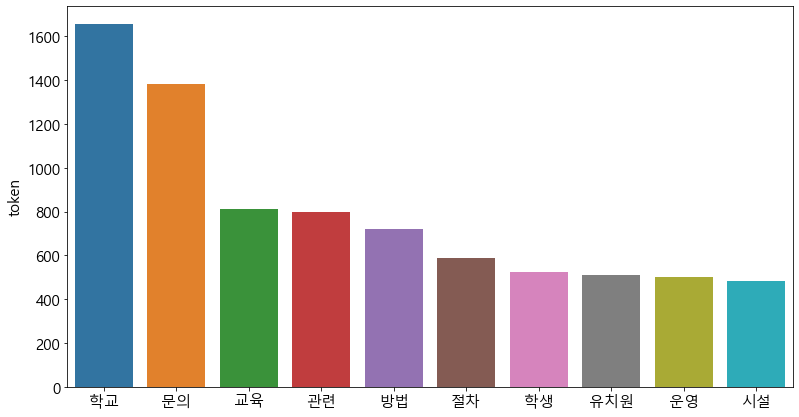

In [28]:
fig, ax = plt.subplots(figsize=(13, 7))
top_10_education = education_tokens_df['token'].value_counts()
sns.barplot(x=top_10_education[0:10].index, y = top_10_education[0:10])

plt.show()

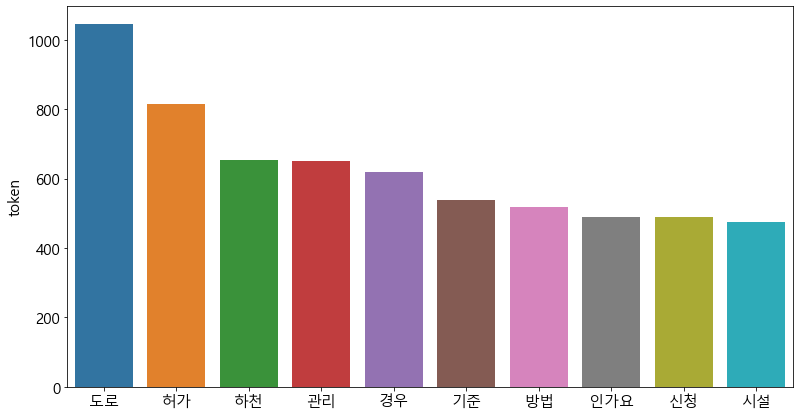

In [29]:
fig, ax = plt.subplots(figsize=(13, 7))

top_10_traffic = traffic_tokens_df['token'].value_counts()
sns.barplot(x=top_10_traffic[0:10].index, y = top_10_traffic[0:10])

plt.show()

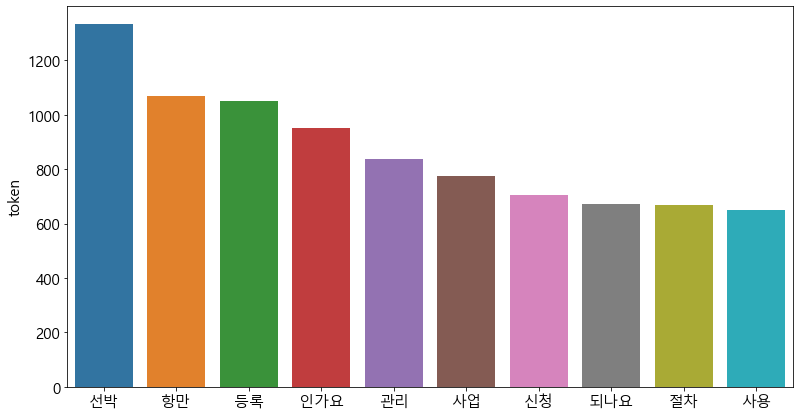

In [30]:
fig, ax = plt.subplots(figsize=(13, 7))
top_10_sea = sea_tokens_df['token'].value_counts()
sns.barplot(x=top_10_sea[0:10].index, y = top_10_sea[0:10])

plt.show()

In [31]:
stopwords.append('인가요')
stopwords.append('되나요')
stopwords.append('있나요')
stopwords.append('하나요')
# 불용어 사전으로 걸러내지 못했던 불용어들을 사전에 추가

In [32]:
stopwords[-5:]

['영', '인가요', '되나요', '있나요', '하나요']

In [36]:
education_tokens = clean(education)
traffic_tokens = clean(traffic)
sea_tokens = clean(sea)

In [37]:
education_tokens_df = token(education_tokens)
traffic_tokens_df = token(traffic_tokens)
sea_tokens_df = token(sea_tokens)

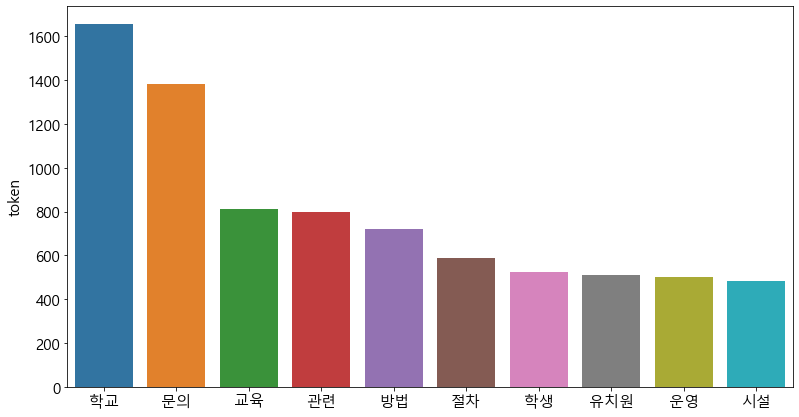

In [38]:
fig, ax = plt.subplots(figsize=(13, 7))
top_10_education = education_tokens_df['token'].value_counts()
sns.barplot(x=top_10_education[0:10].index, y = top_10_education[0:10])

plt.show()

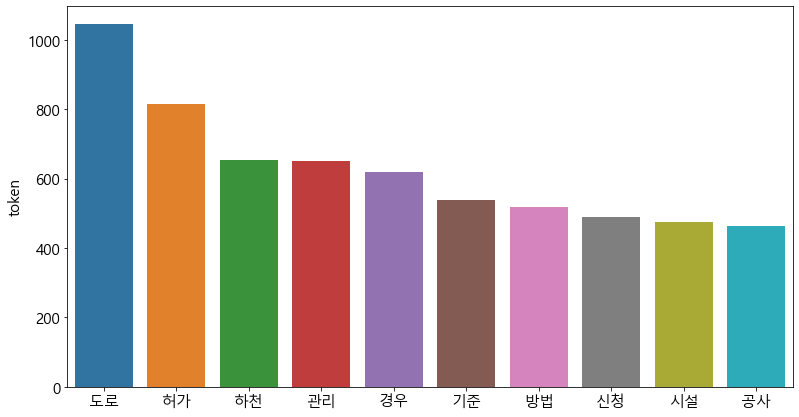

In [39]:
fig, ax = plt.subplots(figsize=(13, 7))
top_10_traffic = traffic_tokens_df['token'].value_counts()
sns.barplot(x=top_10_traffic[0:10].index, y = top_10_traffic[0:10])

plt.show()

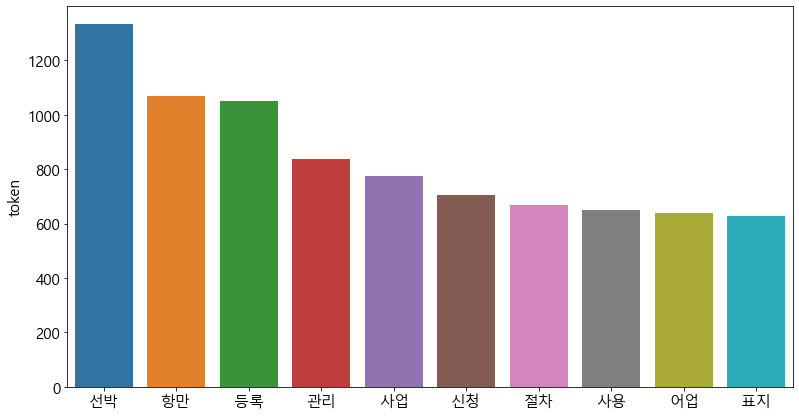

In [40]:
fig, ax = plt.subplots(figsize=(13, 7))
top_10_sea = sea_tokens_df['token'].value_counts()
sns.barplot(x=top_10_sea[0:10].index, y = top_10_sea[0:10])

plt.show()

In [43]:
education_str = ' '.join(education_tokens) 
traffic_str = ' '.join(traffic_tokens) 
sea_str = ' '.join(sea_tokens) 

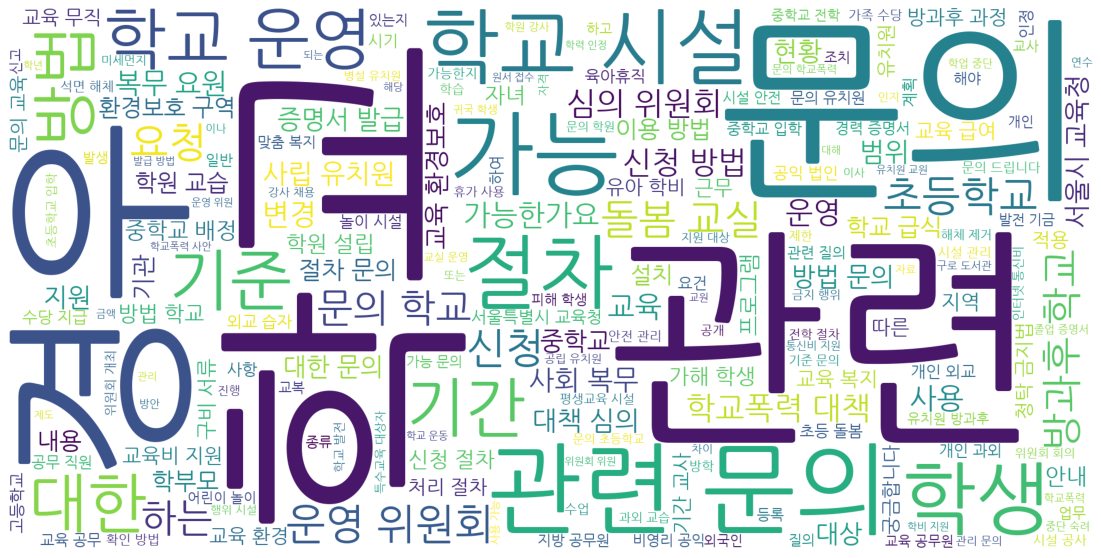

In [44]:
wc = WordCloud(font_path='C:/WINDOWS/Fonts/NanumGothic.ttf',
               width=2000,             # 너비
               height=1000,            # 높이
               background_color='white',   #배경 색
               margin=4)               # 여백

wc.generate(education_str)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')       # 축 없앰
plt.show()

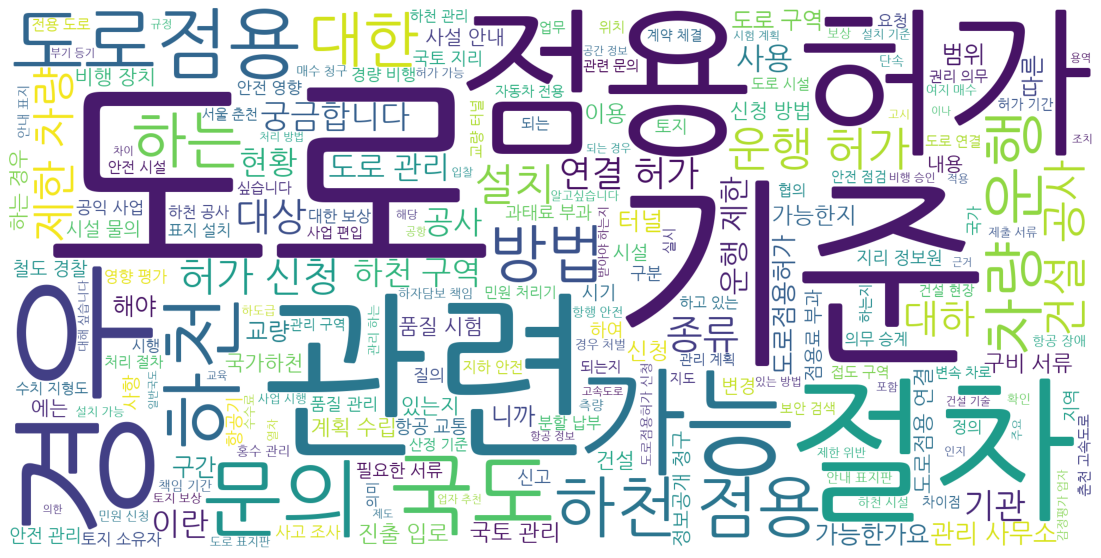

In [45]:
wc = WordCloud(font_path='C:/WINDOWS/Fonts/NanumGothic.ttf',
               width=2000,             # 너비
               height=1000,            # 높이
               background_color='white',   #배경 색
               margin=4)               # 여백

wc.generate(traffic_str)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')       # 축 없앰
plt.show()

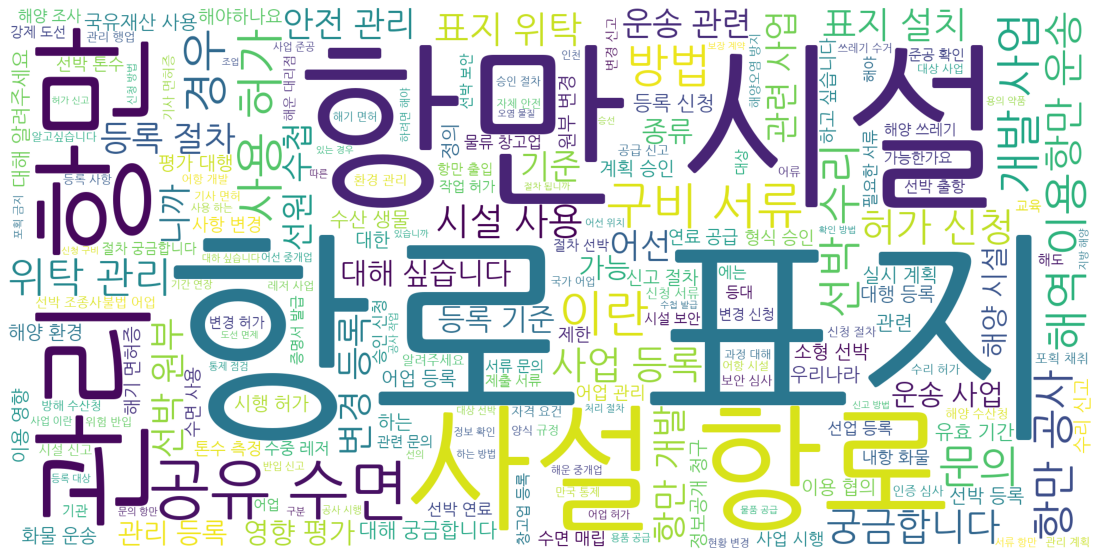

In [46]:
wc = WordCloud(font_path='C:/WINDOWS/Fonts/NanumGothic.ttf',
               width=2000,             # 너비
               height=1000,            # 높이
               background_color='white',   #배경 색
               margin=4)               # 여백

wc.generate(sea_str)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')       # 축 없앰
plt.show()